### K-Means Clustering case study
20220319 - Umesh

#### This is my case study on the K-Means Clustering algorithm.
#### Source:

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

#### Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


#### Attribute Information:

- **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.  
- **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
- **Description:** Product (item) name. Nominal.  
- **Quantity:** The quantities of each product (item) per transaction. Numeric.  
- **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
- **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
- **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
- **Country:** Country name. Nominal, the name of the country where each customer resides.  

### Step 1 : Reading and Understanding the Data

In [1]:
# Importing necessary libraries
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Reading the data file
retail = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [3]:
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [4]:
# Shape of the dataframe
retail.shape

(541909, 8)

In [5]:
# Dataframe info
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Preliminary stat
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Step 2 : Data Cleansing

In [7]:
# Checking the total null values in each column
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Calculating the % contribution of missing values in the DF
df_null = retail.isnull().sum()/len(retail)*100
df_null

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
# Droping rows with missing values
retail = retail.dropna()
retail.shape

(406829, 8)

In [10]:
# Changing the datatype of 'CustomerId' from float to str because we won't be doing any math calculations with 'CustomerID'
retail['CustomerID'] = retail['CustomerID'].astype(str)

### Step 3 : Data Preparation

#### We are going to analysis the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [11]:
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [12]:
# Adding a new attribute 'Amount' for the total monetary value of each transaction
retail['Amount'] = retail['Quantity'] * retail['UnitPrice']

In [13]:
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [14]:
# Calculating the total monetary contribution by each customer
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Amount, Length: 4372, dtype: float64

In [15]:
rfm_m = rfm_m.reset_index()
rfm_m.head(3)

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24


In [16]:
# Adding a new attribute 'Frequency' for the total number of transactions by each customer (# of invoices per customer)
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [17]:
rfm_f.reset_index().head(3)

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31


In [18]:
# Merging the two DFs (rfm_m & rfm_f)
rfm = pd.merge(rfm_m, rfm_f, on = 'CustomerID', how = 'inner')
rfm.head()

,CustomerID,Amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [19]:
rfm.shape

(4372, 3)

In [20]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [21]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
Amount         float64
dtype: object

In [22]:
# Adding a new attribute 'Recency' for the duration of last transaction by each customer
# Convert datetime to proper datatype
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = '%m/%d/%Y %H:%M')
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [23]:
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [24]:
# Capture the latest date to know the last transaction
max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [25]:
# Capture the difference in days between the max date and the transaction date
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00


In [26]:
retail.dtypes

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID              object
Country                 object
Amount                 float64
Diff           timedelta64[ns]
dtype: object

In [27]:
# Capture the last transaction date to get the recency of customers
rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [28]:
rfm_p.shape

(4372, 2)

In [29]:
retail.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,0 days


In [30]:
rfm_p.dtypes

CustomerID             object
Diff          timedelta64[ns]
dtype: object

In [31]:
# Extracting # of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days

In [32]:
rfm_p.dtypes

CustomerID    object
Diff           int64
dtype: object

In [33]:
rfm_p.head(3)

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74


In [34]:
rfm.columns

Index(['CustomerID', 'Amount', 'InvoiceNo'], dtype='object')

In [35]:
# Renaming column name 'InvoiceNo' to 'Frequency'
rfm.columns = ['CustomerID','Amount','Frequency']
rfm.head(3)

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31


In [36]:
# Merging rfm & rfm_p dataframes to get the final rfm dataframe
rfm = pd.merge(rfm, rfm_p, on = 'CustomerID', how = 'inner')
rfm.head(3)

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74


In [37]:
# Renaming column name 'Diff' to 'Recency'
rfm.columns = ['CustomerID','Amount','Frequency','Recency']
rfm.head(3)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74


In [38]:
rfm.shape

(4372, 4)

#### Outlier analysis of Amount, Frequency and Recency

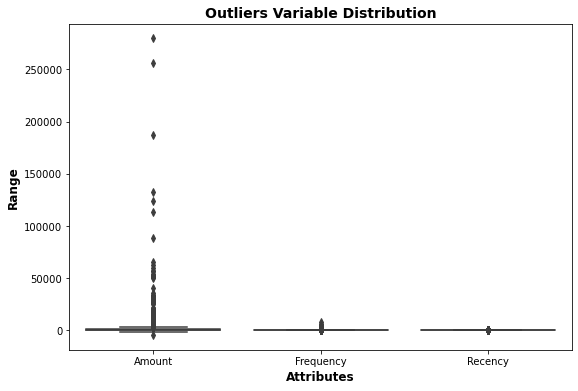

In [39]:
attributes = ['Amount','Frequency','Recency']
plt.figure(figsize = (9,6))
sns.boxplot(data = rfm[attributes])
plt.title('Outliers Variable Distribution', fontsize = 14, fontweight = 'bold')
plt.ylabel('Range', fontsize = 12, fontweight = 'bold')
plt.xlabel('Attributes', fontsize = 12, fontweight = 'bold')
plt.show()

In [40]:
# Removing outliers for Amount
Q1a = rfm.Amount.quantile(0.25)
Q3a = rfm.Amount.quantile(0.75)
IQRa = Q3a - Q1a

rfm = rfm[(rfm.Amount >= (Q1a - 1.5 * IQRa)) & (rfm.Amount <= (Q3a + 1.5 * IQRa))]

# Removing outliers for Frequency
Q1f = rfm.Frequency.quantile(0.25)
Q3f = rfm.Frequency.quantile(0.75)
IQRf = Q3f - Q1f

rfm = rfm[(rfm.Frequency >= (Q1f - 1.5 * IQRf)) & (rfm.Frequency <= (Q3f + 1.5 * IQRf))]

# Removing outliers for Recency
Q1r = rfm.Recency.quantile(0.25)
Q3r = rfm.Recency.quantile(0.75)
IQRr = Q3r - Q1r

rfm = rfm[(rfm.Recency >= (Q1r - 1.5 * IQRr)) & (rfm.Recency <= (Q3r + 1.5 * IQRr))]

In [41]:
rfm.shape

(3697, 4)

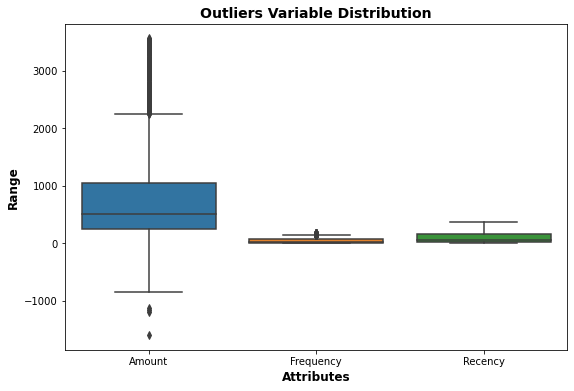

In [42]:
attributes = ['Amount','Frequency','Recency']
plt.figure(figsize = (9,6))
sns.boxplot(data = rfm[attributes])
plt.title('Outliers Variable Distribution', fontsize = 14, fontweight = 'bold')
plt.ylabel('Range', fontsize = 12, fontweight = 'bold')
plt.xlabel('Attributes', fontsize = 12, fontweight = 'bold')
plt.show()

In [43]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [45]:
rfm.describe()

,Amount,Frequency,Recency
count,3697.000000,3697.000000,3697.000000
mean,771.363098,46.658101,103.272383
std,740.646223,41.705211,103.798588
min,-1592.490000,1.000000,0.000000
25%,248.100000,15.000000,22.000000
50%,508.460000,32.000000,60.000000
75%,1046.560000,68.000000,169.000000
max,3563.850000,178.000000,373.000000


In [52]:
# Rescaling the attributes
rfm_df = rfm[['Amount','Frequency','Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-1.04161396, -1.07094871,  2.13642223],
       [ 1.38529792, -0.3754979 , -0.28204953],
       [ 1.33170234,  0.63170672, -0.82162889],
       ...,
       [-0.93247827, -0.9510434 ,  0.73929711],
       [-0.80314128, -0.80715703, -0.92761769],
       [ 1.43936613,  0.55976353, -0.59038059]])

In [57]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount','Frequency','Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828


### Step 4 : Building the Model

#### K-Means Clustering

In [58]:
# K-Means with some arbitrary K
kmeans = KMeans(n_clusters = 4)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4)

In [59]:
kmeans.labels_

array([1, 0, 0, ..., 1, 3, 0])

#### Finding the Optimal Number of Clusters

##### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

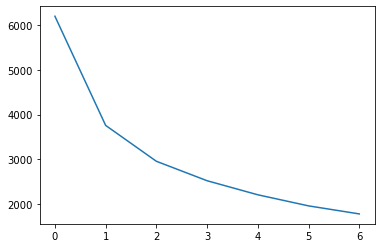

In [60]:
# Elbow-curve/SSD (sum of squares of deviations)
# inertia
# Sum of squared distances of samples to their closest cluster center.

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

In [76]:
ssd

[6206.330006580116,
 3757.978413066658,
 2952.9218593152455,
 2516.6554905891526,
 2201.1233248698363,
 1952.536478861039,
 1772.235510204226]

In [62]:
# Final model with K = 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3)

In [63]:
 kmeans.labels_

array([1, 2, 0, ..., 1, 2, 0])

In [64]:
rfm_df_scaled

,Amount,Frequency,Recency
0,-1.041614,-1.070949,2.136422
1,1.385298,-0.375498,-0.282050
2,1.331702,0.631707,-0.821629
3,-0.590055,-0.711233,1.982257
4,1.045238,1.159290,-0.657828
...,...,...,...
3692,-0.806787,-0.903081,-0.291685
3693,-0.797740,-0.879100,1.673926
3694,-0.932478,-0.951043,0.739297
3695,-0.803141,-0.807157,-0.927618


In [65]:
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
...,...,...,...,...
4366,18278.0,173.90,9,73
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7


In [66]:
# Assign the labels
rfm['Cluster_Id'] = kmeans.labels_
rfm

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1
5,12352.0,1545.41,95,35,0
...,...,...,...,...,...
4366,18278.0,173.90,9,73,2
4367,18280.0,180.60,10,277,1
4368,18281.0,80.82,7,180,1
4369,18282.0,176.60,13,7,2


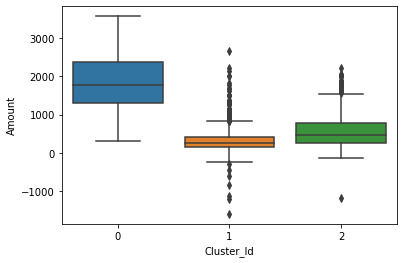

In [69]:
# Box plot to visualize Cluster Id vs Amount
sns.boxplot(x = 'Cluster_Id', y = 'Amount', data = rfm)
plt.show()

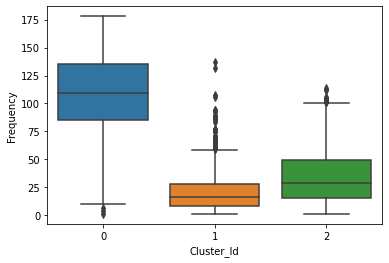

In [71]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x = 'Cluster_Id', y = 'Frequency', data = rfm)
plt.show()

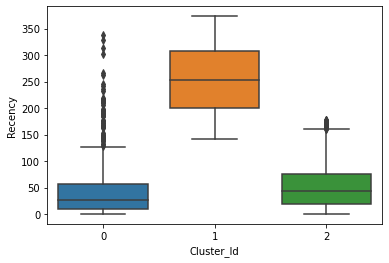

In [72]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x = 'Cluster_Id', y = 'Recency', data = rfm)
plt.show()

In [75]:
rfm[rfm['Cluster_Id'] == 0]

,CustomerID,Amount,Frequency,Recency,Cluster_Id
3,12349.0,1757.55,73,18,0
5,12352.0,1545.41,95,35,0
9,12356.0,2811.43,59,22,0
13,12360.0,2662.06,129,51,0
17,12364.0,1313.10,85,7,0
...,...,...,...,...,...
4351,18257.0,2265.38,123,38,0
4352,18259.0,2338.60,42,24,0
4353,18260.0,2595.00,140,172,0
4361,18272.0,3064.78,170,2,0


### Inference:
#### K-Means Clustering with 3 Cluster Ids
- Customers with Cluster Id 0 are the ones with high amount of transactions (total purchase amount) as compared to others. 
- Customers with Cluster Id 0 are frequent buyers.
- Customers with Cluster Id 1 are not recent buyers and so least important from the business point of view.

#### *** END ***